# Exploratory Data Analysis

In this notebook I will explore the dataset and try to find meaningful insights. I will also look for relationships between variables to help in the machine learning process.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
df = pd.read_csv("train.csv")

# preview data
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,City Hotel,0,3.044522,0,1.098612,1,0.0,0,BB,IRL,...,No Deposit,195.0,0,Transient,98.0,0,0,Check-Out,2017-02-09,2017-02-07
1,City Hotel,0,2.197225,0,1.386294,2,0.0,0,BB,FRA,...,No Deposit,missing,0,Transient-Party,100.0,0,0,Check-Out,2016-03-12,2016-03-09
2,City Hotel,1,4.543295,0,1.386294,2,0.0,0,BB,PRT,...,Non Refund,170.0,0,Transient,95.0,0,0,Canceled,2017-01-03,2017-04-06
3,Resort Hotel,0,4.510860,4,2.397895,2,0.0,0,BB,GBR,...,No Deposit,2.0,0,Contract,54.0,0,0,Check-Out,2015-10-07,2015-09-23
4,City Hotel,0,2.197225,0,0.693147,1,0.0,0,BB,ESP,...,No Deposit,missing,0,Transient,80.0,0,0,Check-Out,2017-08-10,2017-08-09


# 1 Questions

Now I will ask and answer some questions about the dataset in an attempt to gain some useful information.

### Question 1: What are the highest and lowest countries when it comes to the proportion of bookings canceled?

To answer this question I will first find the proportion of bookings canceled and then find which proportions are 1 or 0.

In [48]:
# find proportions of cancelations

# group data by country
group = df.groupby("country")

# find proportions
proportions = dict(group["is_canceled"].count() / (group["is_canceled"].sum() + 0.0001))

In [49]:
# print countries with over %99 cancelation rates
print("Countries with more than %99 cancelations")
countries_with_cancel = []
for key, val in proportions.items():
    if val > 0.99:
        countries_with_cancel.append(key)
        
print(countries_with_cancel)

Countries with more than %99 cancelations
['ABW', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATA', 'ATF', 'AUS', 'AUT', 'AZE', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB', 'CAF', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'CN', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA', 'GIB', 'GLP', 'GNB', 'GRC', 'GTM', 'HKG', 'HND', 'HRV', 'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KHM', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBY', 'LIE', 'LKA', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDG', 'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'MYT', 'NAM', 'NCL', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PLW', 'POL', 'PRI', 'PRT', 'PRY', 'PYF', 'QAT', 'ROU', 'RUS', 'RWA',

In [50]:
# print countries with less than %20 cancelation rates
print("Countries with less then %5 cancelations")
countries_with_no_cancel = []
for key, val in proportions.items():
    if val <= 0.20:
        countries_with_no_cancel.append(key)
        
print(countries_with_no_cancel)

Countries with less then %5 cancelations
[]


It seems that no countries had zero cancelations, while many had no non-canceled bookings. I will further illustrate with a bar graph to show the cancelation proportions for each country

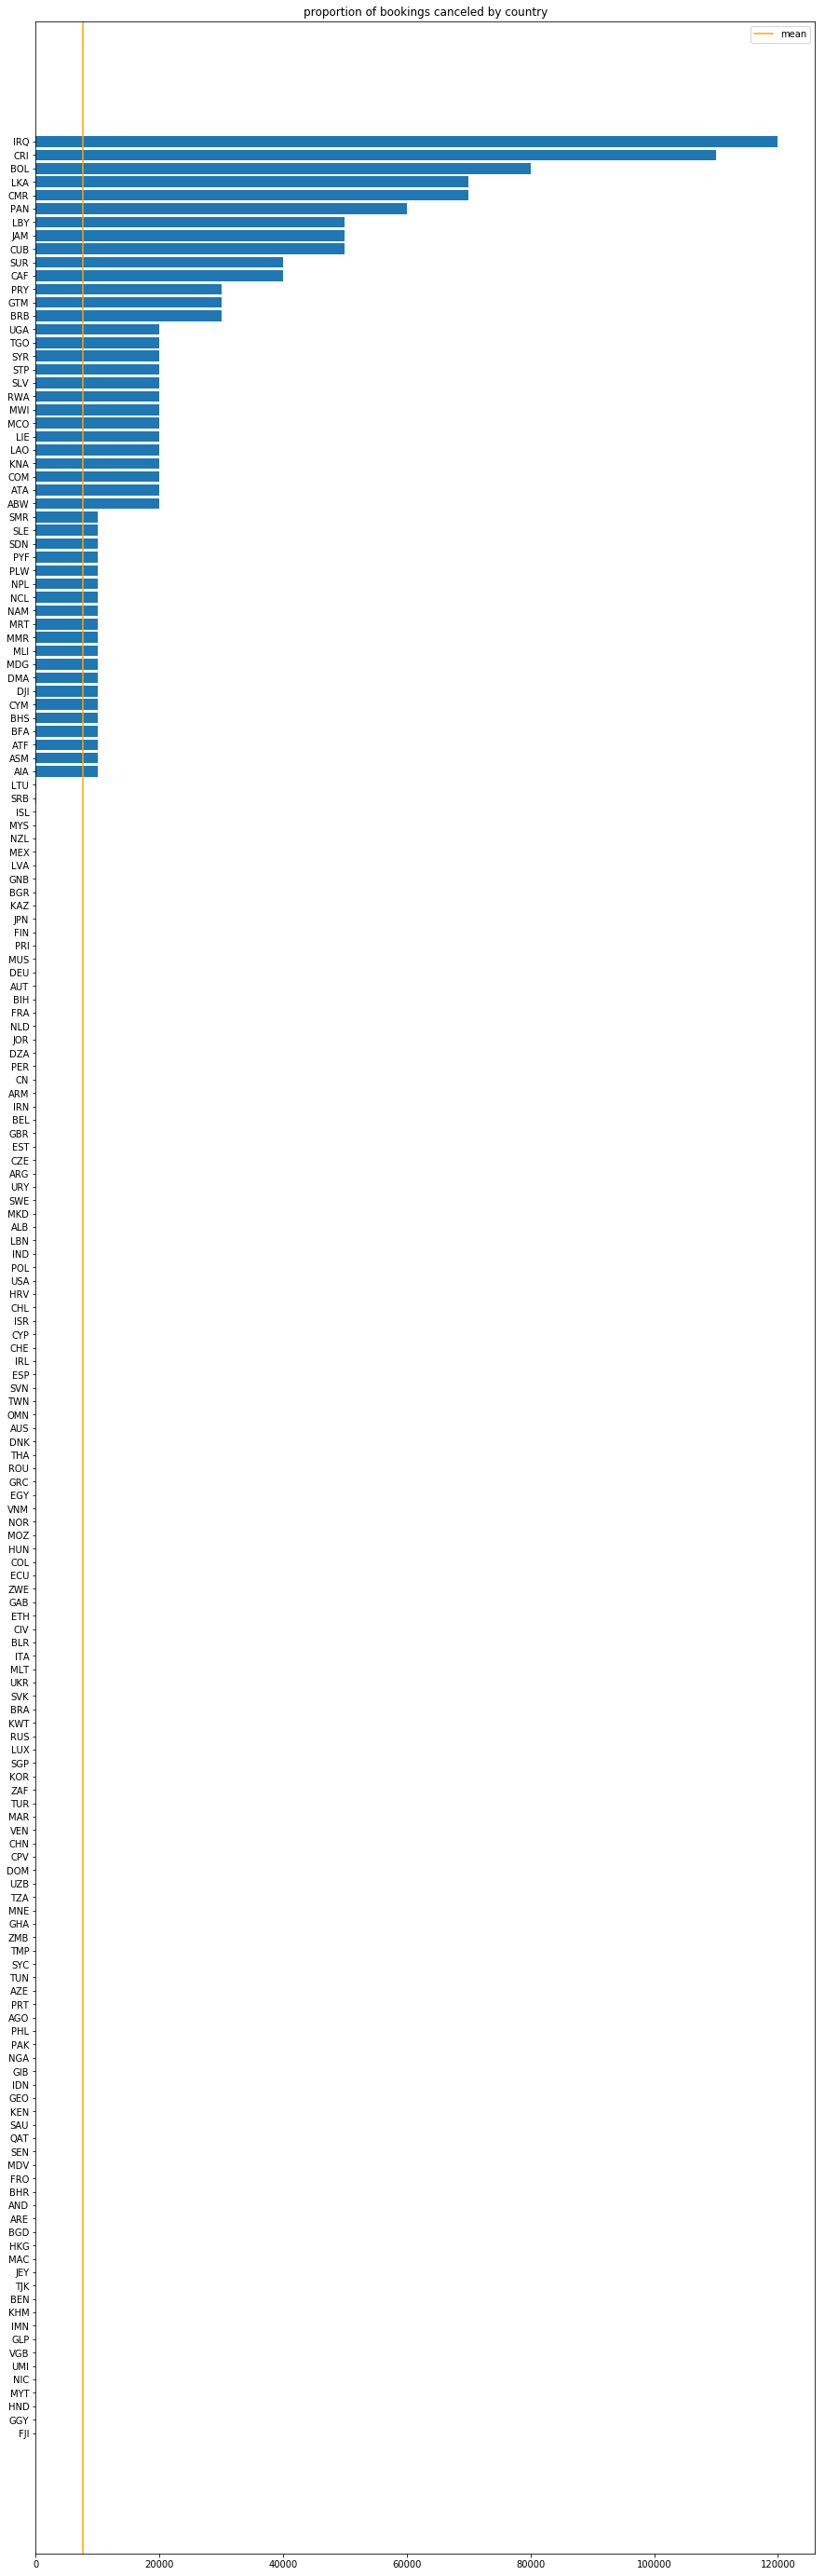

In [51]:
# get proportions
proportions = proportions.items()

# sort the proportions
proportions = sorted(proportions, key=lambda x: x[1])

# get country names
names = [x[0] for x in proportions]

# get proportion values
values = [x[1] for x in proportions]

# plot
plt.figure(figsize=(15, 50))
plt.barh(names, values)
plt.axvline(np.mean(values), label="mean", color="orange")
plt.legend()
plt.title("proportion of bookings canceled by country")
plt.show()

In [52]:
proportions

[('FJI', 0.9999000099990001),
 ('GGY', 0.9999000099990001),
 ('HND', 0.9999000099990001),
 ('MYT', 0.9999000099990001),
 ('NIC', 0.9999000099990001),
 ('UMI', 0.9999000099990001),
 ('VGB', 0.9999000099990001),
 ('GLP', 0.9999500024998749),
 ('IMN', 0.9999500024998749),
 ('KHM', 0.9999500024998749),
 ('BEN', 0.9999666677777407),
 ('TJK', 0.999985714489793),
 ('JEY', 0.999987500156248),
 ('MAC', 1.099989000109999),
 ('HKG', 1.1333257778281478),
 ('BGD', 1.166647222546291),
 ('ARE', 1.18918597517304),
 ('AND', 1.2499687507812305),
 ('BHR', 1.2499687507812305),
 ('FRO', 1.2499687507812305),
 ('MDV', 1.2499843751953101),
 ('SEN', 1.2856959186297339),
 ('QAT', 1.2999870001299987),
 ('SAU', 1.392852168385113),
 ('KEN', 1.4999250037498124),
 ('GEO', 1.4999875001041658),
 ('IDN', 1.526307756274967),
 ('GIB', 1.5999840001599985),
 ('NGA', 1.599989333404444),
 ('PAK', 1.6666388893518442),
 ('PHL', 1.666658730196523),
 ('AGO', 1.763635294766488),
 ('PRT', 1.7774011219100514),
 ('AZE', 1.7777580249

In [53]:
group["is_canceled"].count() 

country
ABW       2
AGO     291
AIA       1
ALB       9
AND       5
ARE      44
ARG     162
ARM       5
ASM       1
ATA       2
ATF       1
AUS     364
AUT    1006
AZE      16
BEL    1882
BEN       3
BFA       1
BGD       7
BGR      64
BHR       5
BHS       1
BIH      11
BLR      23
BOL       8
BRA    1775
BRB       3
CAF       4
CHE    1383
CHL      54
CHN     801
       ... 
SLV       2
SMR       1
SRB      83
STP       2
SUR       4
SVK      57
SVN      48
SWE     817
SYC       2
SYR       2
TGO       2
THA      46
TJK       7
TMP       2
TUN      35
TUR     209
TWN      36
TZA       4
UGA       2
UKR      50
UMI       1
URY      23
USA    1666
UZB       4
VEN      23
VGB       1
VNM       7
ZAF      67
ZMB       2
ZWE       3
Name: is_canceled, Length: 172, dtype: int64

In [54]:
group["is_canceled"].sum() 

country
ABW      0
AGO    165
AIA      0
ALB      2
AND      4
ARE     37
ARG     35
ARM      1
ASM      0
ATA      0
ATF      0
AUS     92
AUT    176
AZE      9
BEL    384
BEN      3
BFA      0
BGD      6
BGR      9
BHR      4
BHS      0
BIH      2
BLR      8
BOL      0
BRA    665
BRB      0
CAF      0
CHE    338
CHL     13
CHN    367
      ... 
SLV      0
SMR      0
SRB      3
STP      0
SUR      0
SVK     21
SVN     12
SWE    180
SYC      1
SYR      0
TGO      0
THA     12
TJK      7
TMP      1
TUN     19
TUR     86
TWN      9
TZA      2
UGA      0
UKR     18
UMI      1
URY      5
USA    399
UZB      2
VEN     10
VGB      1
VNM      2
ZAF     27
ZMB      1
ZWE      1
Name: is_canceled, Length: 172, dtype: int64